# Pregunta 1

Seleccione un dataset del area medica o de abogacia (datos tabulares). Realice lo siguiente:

   a. El calculo del 1er cuartil de datos, el percentil 50 por columna; explique qué significa en cada caso mediante Python sin uso de librerías
   
   b. Realice lo mismo del inciso (a) con el uso de numpy y pandas
   
   c. Grafique los datos y explique su comportamiento (PYTHON)


## Solución a.

In [19]:
from math import floor
import gc

class Dataset():

    def __init__(self, filename):
        self.filename = filename

        
    def to_array(self, x):
        return x.replace("\n", "").split(",")

    
    def get_headers(self):
        """ Lee la cabecera del archivo csv.
        """
        with open(self.filename, 'r') as datafile:
            self.headers = self.to_array(datafile.readline())
        return self.headers

    
    def get_data(self, n=0, batch_size=None):
        """ Abre el archivo en batches de tamaño definido
        para no llenar la memoria al abrir el archivo completo
        y devuelve un generador.
        """
        with open(self.filename, 'r') as datafile:
            datafile.readline()
            if batch_size is None:
                for line in datafile:
                    yield self.to_array(line)
            else:
                init = n * batch_size
                for i in range(init, init + batch_size):
                    yield self.to_array(datafile.readline())

                    
    def get_length(self):
        return sum(1 for i in self.get_data())
                    

    def get_column(self, column):
        print("column:", self.headers[column])
        for i in self.get_data():
            try:
                yield float(i[column])
            except ValueError:
                yield i[column]

                
    def get_min_max(self, array):
        min_val = None
        max_val = None
        for i in array:
            if min_val is None:
                min_val = i
            if max_val is None:
                max_val = i
            if i < min_val:
                min_val = i
            if i > max_val:
                max_val = i
        return (min_val, max_val)


    def make_intervals(self, column, intervals):
        data_col = self.get_column(column)
        col_min, col_max = self.get_min_max(self.get_column(column))
        interval_size = (col_max-col_min)/intervals
        intervals = []
        i = col_min
        while i < col_max:
            intervals.append((i, i+interval_size))
            i += interval_size
        return (intervals, interval_size, col_min)

    
    def get_frequencies(self, column, intervals):
        frequency_labels, size, col_min = self.make_intervals(column, intervals)
        frequencies = [0 for x in range(len(frequency_labels))]
        for i in self.get_column(column):
            try:
                index = floor((i - col_min) / size)
                frequencies[index] += 1
            except:
                print("error on value:", i)
            
        return frequencies
    
    
    def get_cuartile(self, number):
        quart = number * self.get_length() / 4
        pass



## Solución b.

In [39]:
import pandas as pd
import numpy as np
import gc

filename = "../data/sample_data.csv"
df = pd.read_csv(filename)

imu_hand2 = df['IMU_hand2']
imu_hand2.dropna()

cuartile1 = np.percentile(imu_hand2, 25)
print("Primer cuartil:", cuartile1)

percentile50 = np.percentile(imu_hand2, 50)
print("Percentil 50:", percentile50)

del df
del imu_hand2
gc.collect()

Primer cuartil: 0.272281
Percentil 50: 2.09057


0

## Solución c.

In [36]:
filename = "../data/sample_data.csv"
dataset = Dataset(filename)
headers = dataset.get_headers()
data = dataset.get_data()
print(headers)
print(data)
del data
gc.collect()

frequency = dataset.get_frequencies(4, 40)
print(frequency)


['timestamp', 'activity', 'heart_rate', 'IMU_hand1', 'IMU_hand2', 'IMU_hand3', 'IMU_hand4', 'IMU_hand5', 'IMU_hand6', 'IMU_hand7', 'IMU_hand8', 'IMU_hand9', 'IMU_hand10', 'IMU_hand11', 'IMU_hand12', 'IMU_hand13', 'IMU_hand14', 'IMU_hand15', 'IMU_hand16', 'IMU_hand17', 'IMU_chest1', 'IMU_chest2', 'IMU_chest3', 'IMU_chest4', 'IMU_chest5', 'IMU_chest6', 'IMU_chest7', 'IMU_chest8', 'IMU_chest9', 'IMU_chest10', 'IMU_chest11', 'IMU_chest12', 'IMU_chest13', 'IMU_chest14', 'IMU_chest15', 'IMU_chest16', 'IMU_chest17', 'IMU_ankle1', 'IMU_ankle2', 'IMU_ankle3', 'IMU_ankle4', 'IMU_ankle5', 'IMU_ankle6', 'IMU_ankle7', 'IMU_ankle8', 'IMU_ankle9', 'IMU_ankle10', 'IMU_ankle11', 'IMU_ankle12', 'IMU_ankle13', 'IMU_ankle14', 'IMU_ankle15', 'IMU_ankle16', 'IMU_ankle17']
<generator object Dataset.get_data at 0x7f89a0aca728>
column: IMU_hand2
column: IMU_hand2
[1, 1, 7, 6, 12, 6, 6, 9, 17, 17, 29, 26, 18, 17, 10, 6, 3, 4, 12, 29, 36, 159, 111, 72, 140, 141, 116, 767, 223, 104, 579, 1929, 268, 49, 11, 11, 13

<Container object of 41 artists>

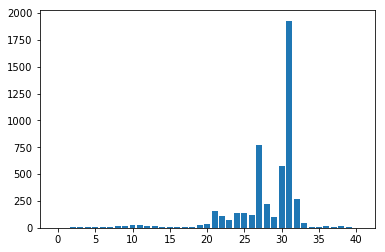

In [37]:
import matplotlib.pyplot as plt

plt.bar(range(len(frequency)), frequency)